In [3]:
%load_ext autoreload
%autoreload 2

from scipy.optimize import curve_fit
from scipy.stats import chisquare
from scipy.stats import gamma
import matplotlib.pyplot as plt
import numpy as np




%run ana_script.py

Loading dumped data from dumps/blue.pickle
Loading dumped data from dumps/green.pickle
Loading dumped data from dumps/grey.pickle
Loading dumped data from dumps/orange.pickle
Loading dumped data from dumps/purple.pickle
Loading dumped data from dumps/red.pickle


/Users/astasik/anaconda3/envs/neuroscience/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


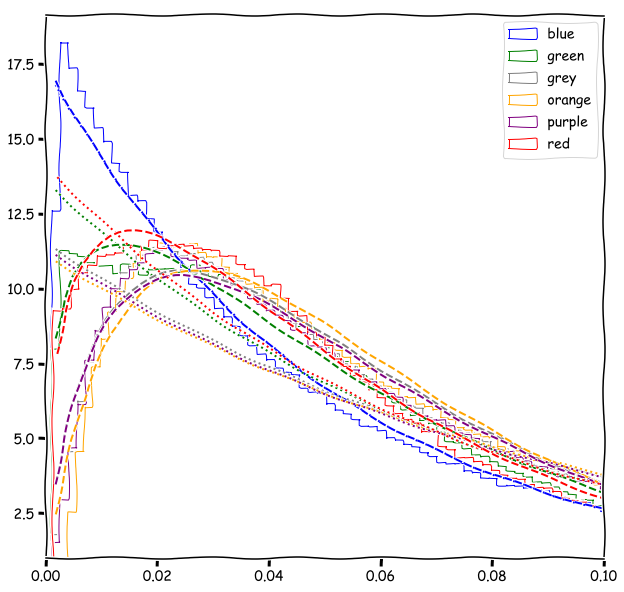

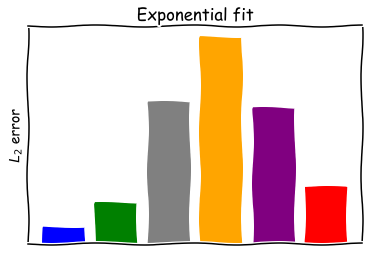

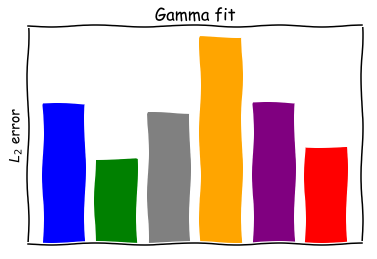

In [4]:
from analysis_functions import compute_isi_fits
compute_isi_fits(all_data)